In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [39]:
#reading the csv file
df = pd.read_csv("Diwali Sales Data.csv", encoding= 'unicode_escape')

In [40]:
df.shape

(11251, 15)

In [41]:
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN


In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


In [43]:
# drop Unnessary columns
df.drop(['Status', 'unnamed1','Cust_name'], axis=1,inplace= True)

In [44]:
df.head()

,User_ID,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount
0,1002903,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0
1,1000732,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0
2,1001990,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0
3,1001425,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0
4,1000588,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0


In [45]:
#checking for null values
df.isnull().sum()

User_ID              0
Product_ID           0
Gender               0
Age Group            0
Age                  0
Marital_Status       0
State                0
Zone                 0
Occupation           0
Product_Category     0
Orders               0
Amount              12
dtype: int64

In [46]:
# Filling the null Values
df['Amount'] = df['Amount'].fillna(df['Amount'].mean())

In [47]:
# Checking the null values again
df.isnull().sum()

User_ID             0
Product_ID          0
Gender              0
Age Group           0
Age                 0
Marital_Status      0
State               0
Zone                0
Occupation          0
Product_Category    0
Orders              0
Amount              0
dtype: int64

In [48]:
# Changing the datatype of Amount
df['Amount'] = df['Amount'].astype(int)

In [49]:
# Checking Amount datatypes
df['Amount'].dtypes

dtype('int32')

In [50]:
df.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age Group', 'Age', 'Marital_Status',
       'State', 'Zone', 'Occupation', 'Product_Category', 'Orders', 'Amount'],
      dtype='object')

In [51]:
# describe() method returns description of the data in the DataFrame (i.e. count, mean, std, etc)
df.describe()

,User_ID,Age,Marital_Status,Orders,Amount
count,1.125100e+04,11251.000000,11251.000000,11251.000000,11251.000000
mean,1.003004e+06,35.421207,0.420318,2.489290,9453.609901
std,1.716125e+03,12.754122,0.493632,1.115047,5219.569169
min,1.000001e+06,12.000000,0.000000,1.000000,188.000000
25%,1.001492e+06,27.000000,0.000000,1.500000,5443.500000
50%,1.003065e+06,33.000000,0.000000,2.000000,8110.000000
75%,1.004430e+06,43.000000,1.000000,3.000000,12671.000000
max,1.006040e+06,92.000000,1.000000,4.000000,23952.000000


In [52]:
# use describe() for specific columns
df[['Age', 'Orders', 'Amount']].describe()

,Age,Orders,Amount
count,11251.000000,11251.000000,11251.000000
mean,35.421207,2.489290,9453.609901
std,12.754122,1.115047,5219.569169
min,12.000000,1.000000,188.000000
25%,27.000000,1.500000,5443.500000
50%,33.000000,2.000000,8110.000000
75%,43.000000,3.000000,12671.000000
max,92.000000,4.000000,23952.000000


# Exploratory Data Analyis


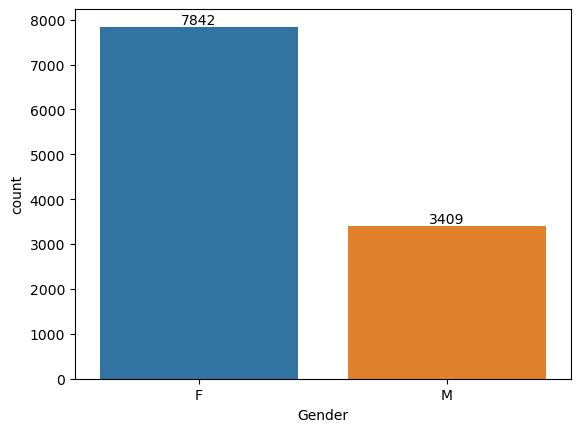

In [64]:
# Plotting a bar chart to display gender and its count
ax=sns.countplot(x= 'Gender', data = df)
for bars in ax.containers:
    ax.bar_label(bars)

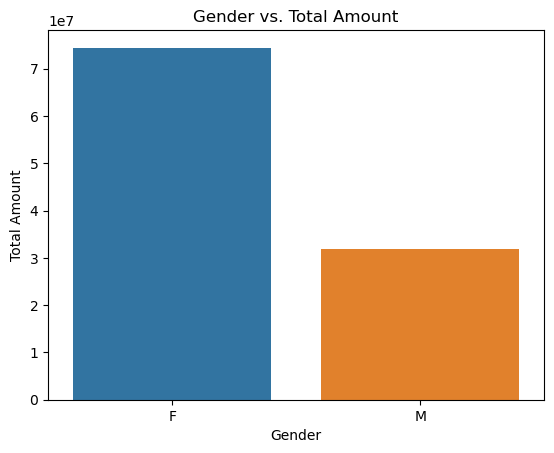

In [65]:
# Bar Chart to display amount spent on the basis of gender
df_total = df.groupby('Gender')['Amount'].sum().reset_index()
sns.barplot(x='Gender', y='Amount', data=df_total)
plt.title('Gender vs. Total Amount')
plt.xlabel('Gender')
plt.ylabel('Total Amount')
plt.show()

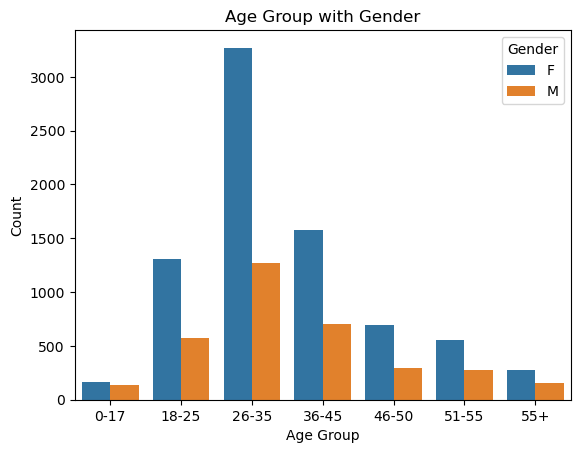

In [67]:
# Plotting Bar chart of Age Group on the basis of Gender
df_counts = df.groupby(['Age Group', 'Gender']).size().reset_index(name='Count')
sns.barplot(x='Age Group', y='Count', hue='Gender', data=df_counts)
plt.title('Age Group with Gender')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.show()

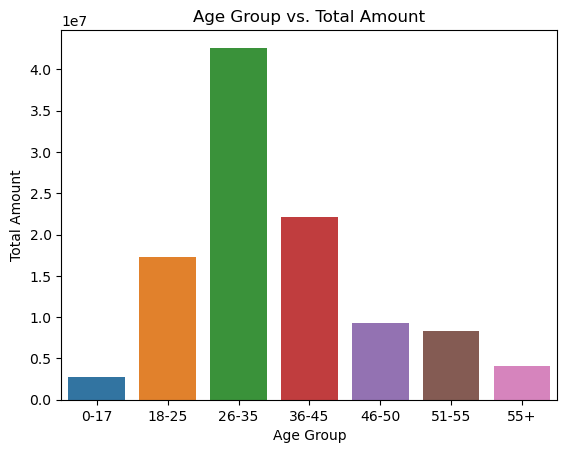

In [70]:
# plotting Bar Chart on the basis of age groupn with amount
df_total = df.groupby('Age Group')['Amount'].sum().reset_index()
sns.barplot(x='Age Group', y='Amount', data=df_total)
plt.title('Age Group vs. Total Amount')
plt.xlabel('Age Group')
plt.ylabel('Total Amount')
plt.show()

<Axes: xlabel='State', ylabel='Orders'>

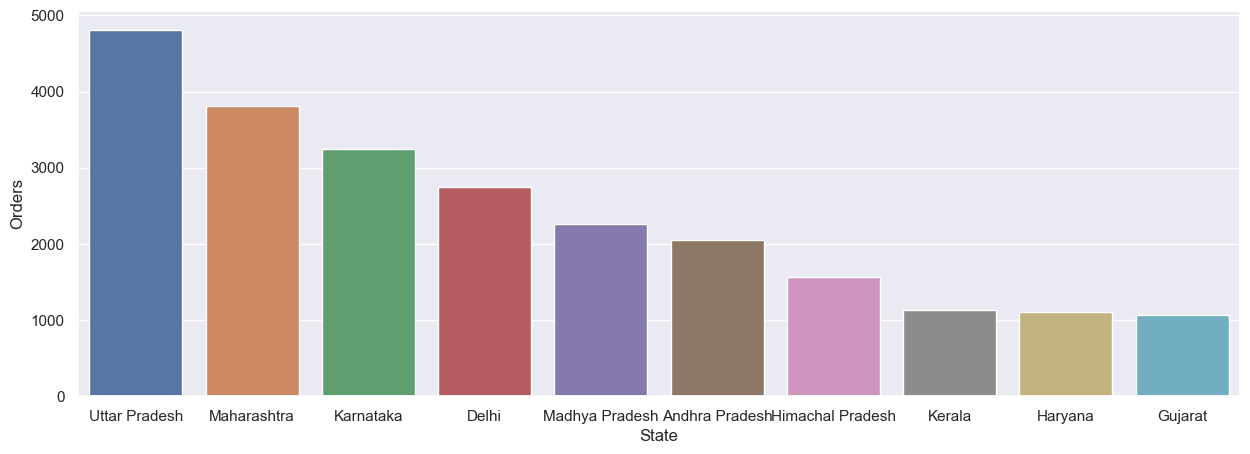

In [75]:
# Plotting top 10 states on the basis of orders
sales_state = df.groupby(['State'], as_index=False)['Orders'].sum().sort_values(by='Orders', ascending=False).head(10)

sns.set(rc={'figure.figsize':(15,5)})
sns.barplot(data = sales_state, x = 'State',y= 'Orders')

<Axes: xlabel='State', ylabel='Amount'>

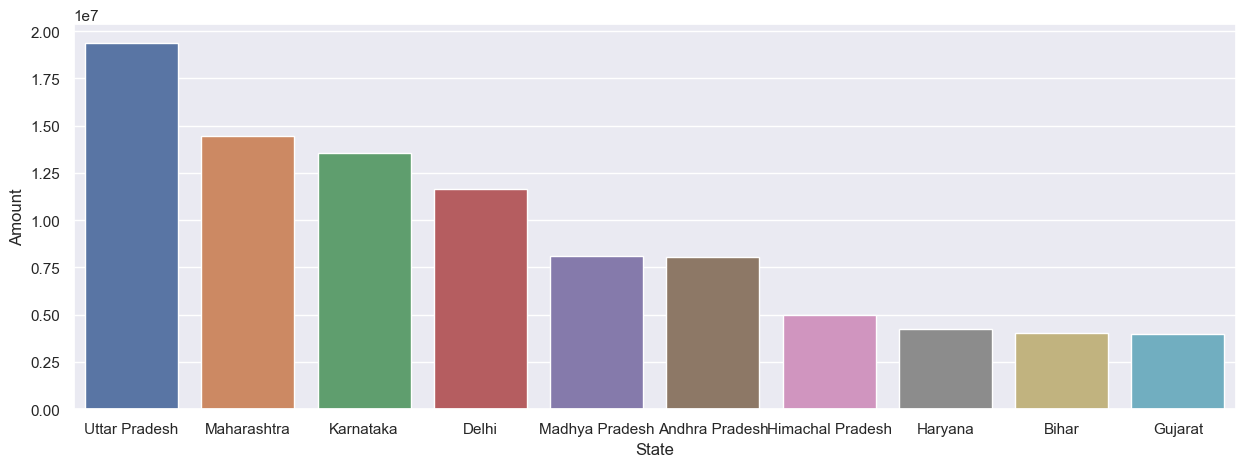

In [76]:
# Plotting top 5 states on the basis of amount
sales_state = df.groupby(['State'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False).head(10)

sns.set(rc={'figure.figsize':(15,5)})
sns.barplot(data = sales_state, x = 'State',y= 'Amount')

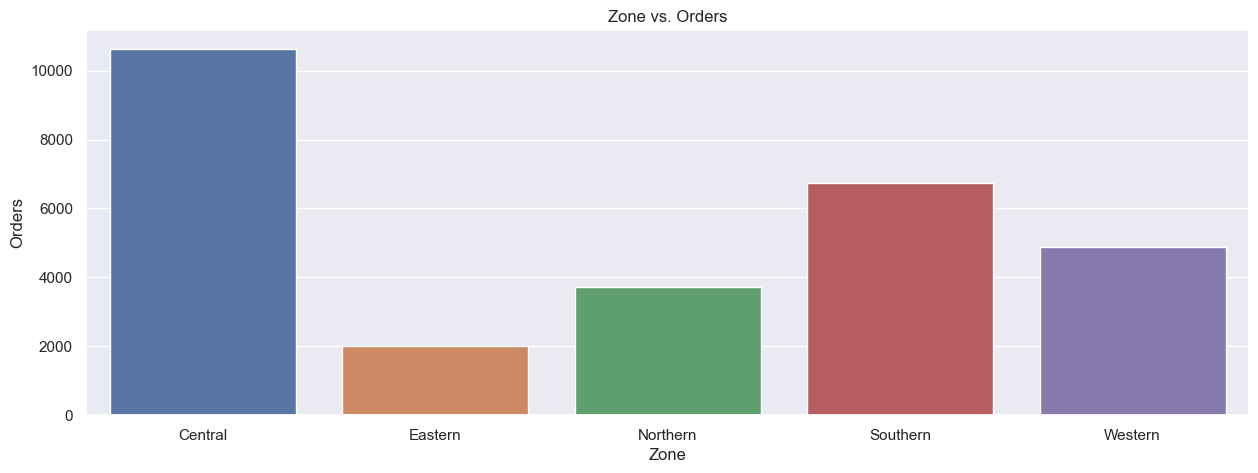

In [77]:
## Plotting zones on the basis of orders
df_total = df.groupby('Zone')['Orders'].sum().reset_index()
sns.barplot(x='Zone', y='Orders', data=df_total)
plt.title('Zone vs. Orders')
plt.xlabel('Zone')
plt.ylabel('Orders')
plt.show()

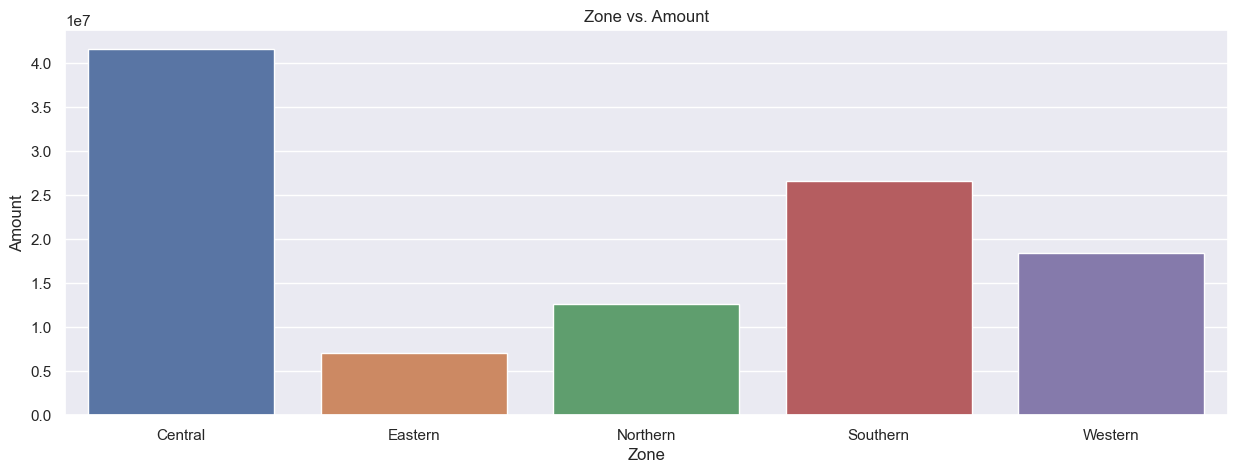

In [78]:
# plotting zones on the basis of the Amount
df_total = df.groupby('Zone')['Amount'].sum().reset_index()
sns.barplot(x='Zone', y='Amount', data=df_total)
plt.title('Zone vs. Amount')
plt.xlabel('Zone')
plt.ylabel('Amount')
plt.show()

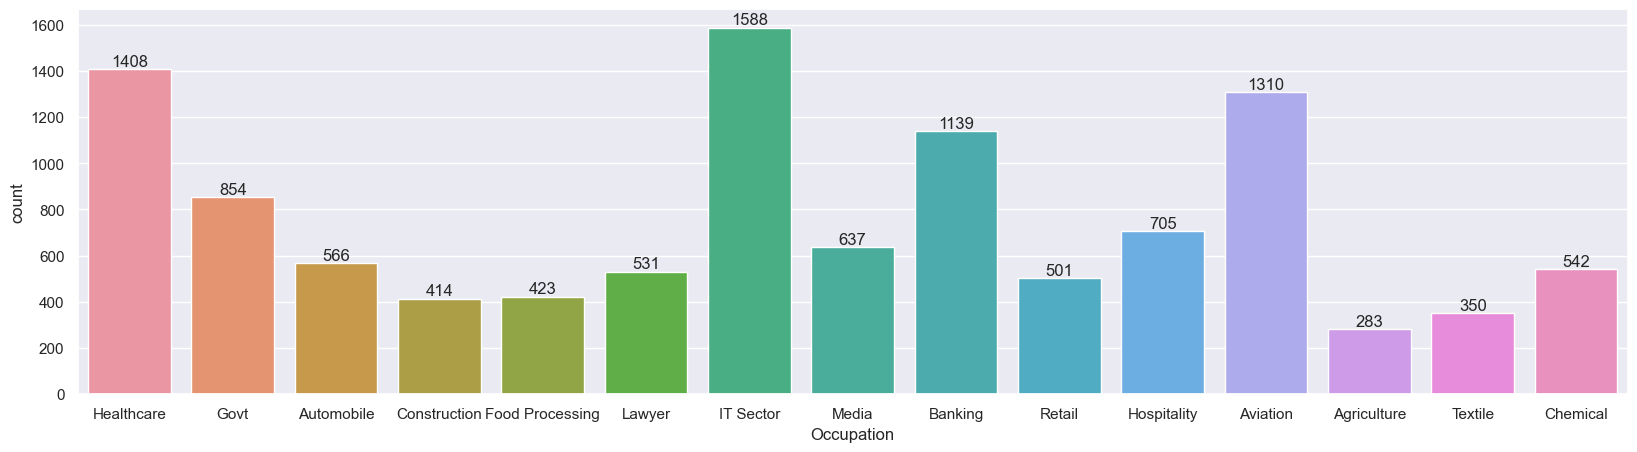

In [79]:
# Chart showing Occupation Status
sns.set(rc={'figure.figsize':(20,5)})
ax = sns.countplot(data = df, x = 'Occupation')

for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='Occupation', ylabel='Amount'>

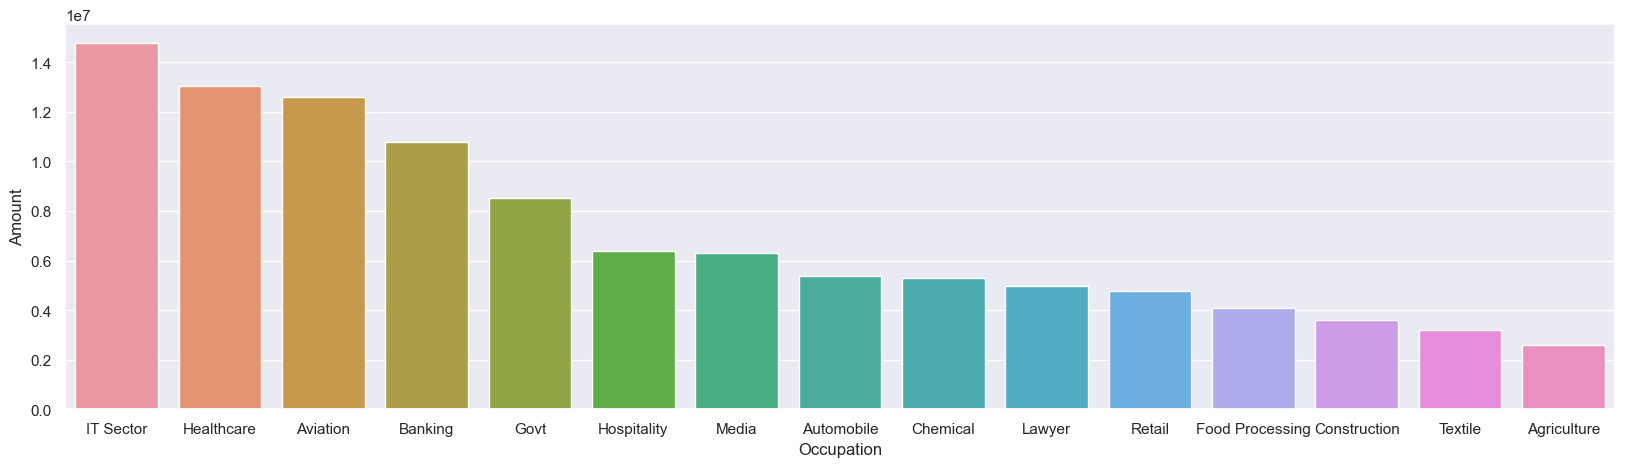

In [81]:
# Plotting Bar chart for Occupation vs Amount spend
Occupation_amount= df.groupby(['Occupation'], as_index= False)['Amount'].sum().sort_values(by='Amount' , ascending= False)
sns.set(rc={'figure.figsize':(20,5)})
sns.barplot(data = Occupation_amount, x = 'Occupation', y='Amount')

<Axes: xlabel='Product_ID', ylabel='Orders'>

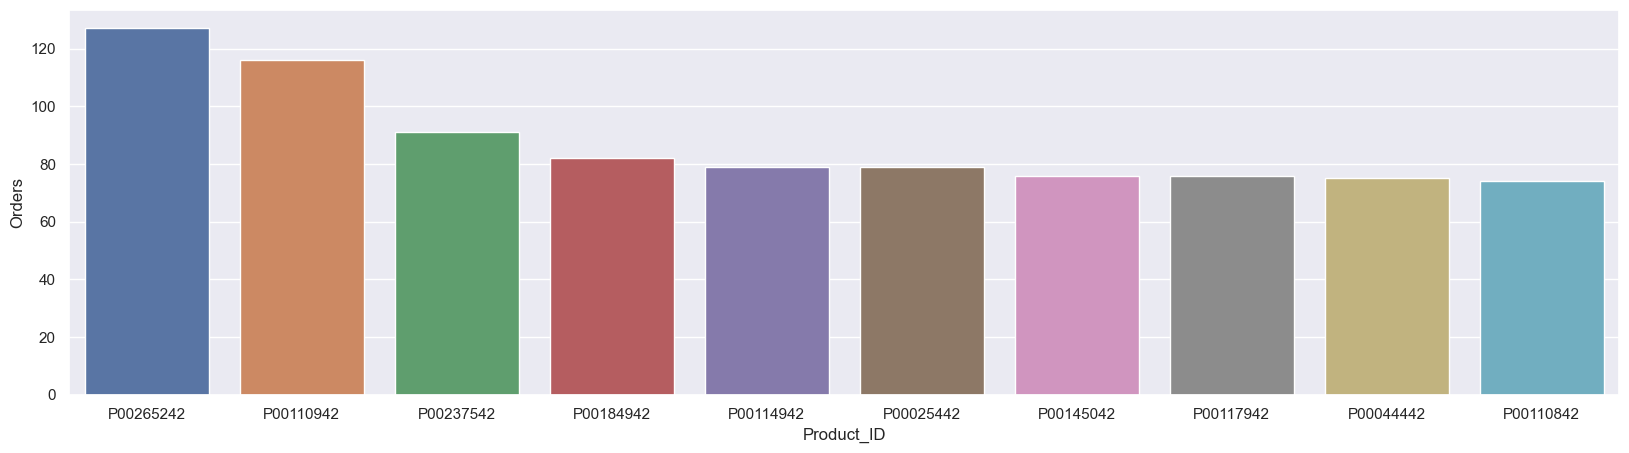

In [88]:
# Top product vs no of orders
product_orders= df.groupby(['Product_ID'], as_index= False)['Orders'].sum().sort_values(by='Orders' , ascending= False).head(10)
sns.set(rc={'figure.figsize':(20,5)})
sns.barplot(data= product_orders, x = 'Product_ID' , y='Orders')

# Conclusion
After perfroming the Exploratory Data Analysis we conclude that Married women with the age group between 25-30 yrs from UP, Maharastra and Karnataka who are working in IT, Healthcare and Aviation are more likely to buy Product.